# Basic Numerical Methods


## 1. Least Squares Method and Regression Analysis



### a. Least Squares Method

The least squares method minimizes the sum of squared differences between observed and predicted values. It's used to find the best-fitting line in regression analysis.

Mathematically:
$$
	{Error} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Where:
$$
(y_i) = actual value
$$
$$
(\hat{y}_i) = predicted value$$
$$
    


### b. Simple Linear Regression Example

Goal of Linear Regression:

We want to find the best-fitting line: \( y = mx + b \)

Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]
Slope (m): 0.7499999999999999
Intercept (b): 1.3899999999999992
Residuals: [0.027]
Rank of matrix A: 2
Singular values of A: [7.69121313 0.91936964]


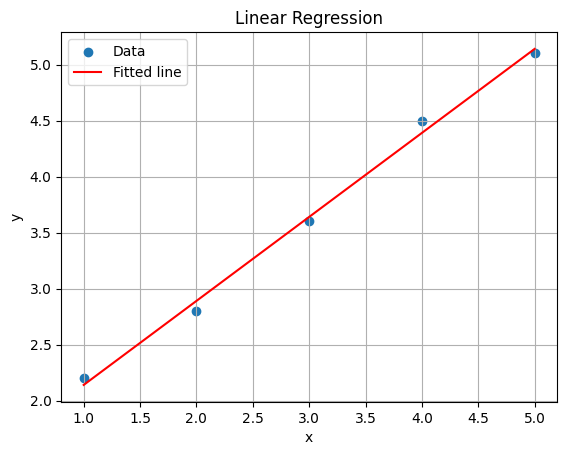

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Design matrix construction based on data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.2,2.8,3.6,4.5,5.1])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#### Exercise- Make up a set of data and find their best fit using least squares linear regression.

Design Matrix A:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]
 [9. 1.]]
Slope (m): 2.478333333333337
Intercept (b): 76.17499999999997
Residuals: [674.91183333]
Rank of matrix A: 2
Singular values of A: [17.09244409  1.35954226]


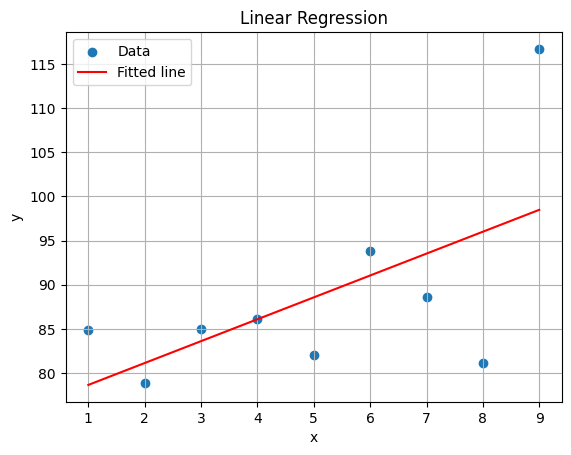

In [4]:
# Your code here
x = np.array([1, 2, 3, 4, 5,6,7,8,9])
y = np.array([84.9,78.9,85,86.1,82,93.8,88.6,81.1,116.7])

# Step 2: Build matrix A: Each row represents the linear model y=mx+c.
A = np.vstack([x, np.ones(len(x))]).T # Stack x and a column of ones and then transpose it
print ("Design Matrix A:\n", A) # The first column is the value of x. The second column is always 1, which allows us to solve for the intercept c.

# Step 3: Fit line using least squares- it solves for the slope m and intercept c of the best-fit line
# np.linalg.lstsq returns a tuple (coeffs, residuals, rank, s), so unpack accordingly.
coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
m = coeffs[0]
b = coeffs[1]

# Step 4: Output the results and plot them
print("Slope (m):", m)
print("Intercept (b):", b)
print("Residuals:", residuals)
print("Rank of matrix A:", rank)
print("Singular values of A:", s) 

plt.scatter(x, y, label='Data')
plt.plot(x, m*x + b, 'r', label='Fitted line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


## 2. Root Finding Methods in Numerical Analysis

This notebook demonstrates two popular numerical methods for finding roots of equations:

1. **Bisection Method**
2. **Newton-Raphson Method**

We will use the function:
\[ f(x) = x^3 - 2x - 5 \]



### a. Bisection Method

The Bisection Method is a simple and robust technique for finding roots of a continuous function. It works by repeatedly halving an interval and selecting the subinterval in which the function changes sign.

#### Algorithm Steps:
1. Define the function f(x)
2. Choose interval [a, b] where f(a) * f(b) < 0
3. Repeat until convergence:
   - Compute midpoint c = (a + b)/2
   - Evaluate f(c)
   - If f(c) * f(a) < 0, set b = c
   - Else, set a = c
   - Stop when |f(c)| is small enough


Root found using Bisection Method: 2.0946


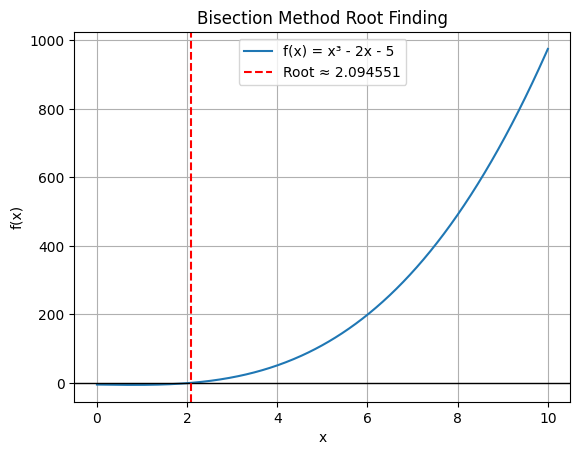

In [11]:
# Complete the Bisection Method implementation
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - 2*x - 5
[a, b] = [0, 10]  # Interval where the root is suspected

for iteration in range(100):
    c = (a + b) / 2  # Midpoint
    if f(c) == 0.0:
        break  # Found exact root
    elif f(a) * f(c) < 0:
        b = c  # Root is in left subinterval
    else:
        a = c  # Root is in right subinterval

print("Root found using Bisection Method:", round(c,4))
root_bisection = c
x = np.linspace(0, 10, 400)
y = f(x)

plt.plot(x, y, label='f(x) = x³ - 2x - 5')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(root_bisection, color='red', linestyle='--', label=f'Root ≈ {root_bisection:.6f}')
plt.title("Bisection Method Root Finding")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()



### b. Newton-Raphson Method

The Newton-Raphson Method is an efficient technique for finding roots using the function's derivative.

#### Algorithm Steps:
1. Define the function and its deriative

2. Start with an initial guess \( x_0 \).

3. Repeat 
   Compute the next approximation using:

   $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

   Until:

   $$ |x_{n+1} - x_n| < \varepsilon $$

4. Return the final approximation $$ x_{n+1} $$ as the root.



In [14]:
# Complete the Newton-Raphson Method implementation
def f(x):
    return x**3 - 2*x - 5

def df(x):
    return 3*x**2 - 2

x_0=3.0  # Initial guess
for iteration in range(100):
    x_1 = x_0 - f(x_0) / df(x_0)  # Newton-Raphson formula
    if abs(x_1 - x_0) < 1e-7:  # Convergence check
        break
    x_0 = x_1

root_newton=x_0
print("Root found using Newton-Raphson Method:", root_newton)


Root found using Newton-Raphson Method: 2.0945514815423474


### Root finding exercise: Beam Deflection

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$

#### 🎯 Task:
Use a root-finding method (e.g., Newton-Raphson or Bisection) to find the position \( x \) along the beam where the **maximum deflection** occurs.

#### 💡 Hint:
To find the maximum deflection:
1. Compute the derivative y'(x) 
2. Solve y'(x) = 0  within the interval x in [0, L] 

#### 📌 Constants:
- L = 10 
- w = 5 
- E and I are constants (you may assume EI = 1 for simplicity)

In [25]:
# Your code here
L=10
w=5
def y(x):
   return (w/24)*x*(L**3-2*L*x**2+x**3)

def dy(x):
   return (w/24)*(L**3 - 6*L*x**2 + 4*x**3)

[o,L]=[0,10]  # Interval where the root is suspected



for iteration in range(100):
    c = (o + L) / 2  # Midpoint
    if f(c) == 0.0:
        break  # Found exact root
    elif f(a) * f(c) < 0:
        L = c  # Root is in left subinterval
    else:
        o = c  # Root is in right subinterval
roots=c
print("Roots of dy(x)=0 within [0, L]:", c)



Roots of dy(x)=0 within [0, L]: 10.0
